In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
data=pd.read_csv('telcom_data.csv')

In [3]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [4]:
data.info

<bound method DataFrame.info of            Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN              NaN       NaN              NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number         

In [5]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


# Task 3 - Experience Analytics

# Task 3.1 Network parameters like

1.TCP retransmission

2.Round Trip Time (RTT)

3.Throughput

The customersdevice characteristics like the handset type to conduct a deep user experience analysis.

The network parameters are all columns in the dataset.

The following questions are your guidance to complete the task.

For this task, you need a Python script that includes all solutions to tasks.

In [6]:
#1.TCP retransmission
data['avg_tcp_retransmission'] = (data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']) / 2
data['avg_tcp_retransmission']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
149996   NaN
149997   NaN
149998   NaN
149999   NaN
150000   NaN
Name: avg_tcp_retransmission, Length: 150001, dtype: float64

In [7]:
data['avg_tcp_retransmission'].isnull().sum()

99530

In [8]:
data['avg_rtt'] = (data['Avg RTT DL (ms)']+ data['Avg RTT UL (ms)']) / 2
data['avg_rtt']

0         23.5
1         35.0
2          NaN
3          NaN
4          NaN
          ... 
149996    16.0
149997    14.5
149998    24.5
149999    21.0
150000     NaN
Name: avg_rtt, Length: 150001, dtype: float64

In [9]:
# Calculate the average RTT
data['avg_rtt'].fillna(data['avg_rtt'].mean(), inplace=True)
data['avg_rtt']

0         23.500000
1         35.000000
2         63.512443
3         63.512443
4         63.512443
            ...    
149996    16.000000
149997    14.500000
149998    24.500000
149999    21.000000
150000    63.512443
Name: avg_rtt, Length: 150001, dtype: float64

In [10]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [11]:
# Calculate the average throughput
data['avg_throughput'] = data["Avg Bearer TP DL (kbps)"] + data["Avg Bearer TP UL (kbps)"]
data['avg_throughput'] 

0          67.0
1          42.0
2          15.0
3          88.0
4          15.0
          ...  
149996    117.0
149997     77.0
149998     90.0
149999     71.0
150000      NaN
Name: avg_throughput, Length: 150001, dtype: float64

In [12]:
data['avg_throughput'].fillna(data['avg_throughput'].mean(), inplace=True)
data['avg_throughput'] 

0            67.000000
1            42.000000
2            15.000000
3            88.000000
4            15.000000
              ...     
149996      117.000000
149997       77.000000
149998       90.000000
149999       71.000000
150000    15070.474573
Name: avg_throughput, Length: 150001, dtype: float64

In [13]:

data['Handset Type'].fillna(data['Handset Type'].mode()[0], inplace=True)
data['Handset Type']

0          Samsung Galaxy A5 Sm-A520F
1         Samsung Galaxy J5 (Sm-J530)
2            Samsung Galaxy A8 (2018)
3                           undefined
4                    Samsung Sm-G390F
                     ...             
149996    Apple iPhone 8 Plus (A1897)
149997        Apple iPhone Se (A1723)
149998        Apple iPhone Xs (A2097)
149999                 Huawei Fig-Lx1
150000               Huawei B528S-23A
Name: Handset Type, Length: 150001, dtype: object

In [14]:
# Treat outliers by replacing with the mean of the corresponding variable
def replace_outliers_with_mean(column):
    mean = column.mean()
    std = column.std()
    column[np.abs(column - mean) > 3 * std] = mean

replace_outliers_with_mean(data['avg_tcp_retransmission'])
replace_outliers_with_mean(data['avg_rtt'])
replace_outliers_with_mean(data['avg_throughput'])


C:\Users\mohsi\AppData\Local\Temp/ipykernel_5644/2222068503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[np.abs(column - mean) > 3 * std] = mean


In [15]:
# Aggregate the information per customer
grouped_data = data.groupby('MSISDN/Number').agg({
    'avg_tcp_retransmission': 'mean',
    'avg_rtt': 'mean',
    'Handset Type': lambda x: x.mode()[0],
    'avg_throughput': 'mean'
})


In [16]:
grouped_data 

,avg_tcp_retransmission,avg_rtt,Handset Type,avg_throughput
MSISDN/Number,,,,
3.360100e+10,NaN,23.000000,Huawei P20 Lite Huawei Nova 3E,76.0
3.360100e+10,NaN,15.500000,Apple iPhone 7 (A1778),99.0
3.360100e+10,NaN,63.512443,undefined,97.0
3.360101e+10,NaN,42.000000,Apple iPhone 5S (A1457),248.0
3.360101e+10,4685416.0,29.750000,Apple iPhone Se (A1723),28422.0
...,...,...,...,...
3.379000e+10,109022.5,26.000000,Huawei Honor 9 Lite,10365.0
3.379000e+10,NaN,20.000000,Apple iPhone 8 Plus (A1897),116.0
3.197021e+12,NaN,63.512443,Quectel Wireless. Quectel Ec25-E,1.0


# Task 3.2 - Compute & list 10 of the top, bottom and most frequent:
a. TCP values in the dataset.

b. RTT values in the dataset.

c. Throughput values in the dataset

In [17]:
# Compute the top, bottom, and most frequent values for TCP
top_10_tcp = data['avg_tcp_retransmission'].nlargest(10)
bottom_10_tcp = data['avg_tcp_retransmission'].nsmallest(10)
most_frequent_10_tcp = data['avg_tcp_retransmission'].value_counts().head(10)

# Compute the top, bottom, and most frequent values for RTT
top_10_rtt = data['avg_rtt'].nlargest(10)
bottom_10_rtt = data['avg_rtt'].nsmallest(10)
most_frequent_10_rtt = data['avg_rtt'].value_counts().head(10)

# Compute the top, bottom, and most frequent values for throughput
top_10_throughput = data['avg_throughput'].nlargest(10)
bottom_10_throughput = data['avg_throughput'].nsmallest(10)
most_frequent_10_throughput = data['avg_throughput'].value_counts().head(10)

# Print the results
print("*"*50)
print("Top 10 TCP values:")
print(top_10_tcp)
print("\nBottom 10 TCP values:")
print(bottom_10_tcp)
print("\nMost frequent 10 TCP values:")
print(most_frequent_10_tcp)
print("*"*50)

print("*"*50)
print("\nTop RTT 10 values:")
print(top_10_rtt)
print("\nBottom RTT 10 values:")
print(bottom_10_rtt)
print("\nMost frequent  10 RTT values:")
print(most_frequent_10_rtt)
print("*"*50)

print("*"*50)
print("\nTop 10 throughput values:")
print(top_10_throughput)
print("\nBottom 10 throughput values:")
print(bottom_10_throughput)
print("\nMost frequent 10 throughput values:")
print(most_frequent_10_throughput)
print("*"*50)

**************************************************
Top 10 TCP values:
3653      313234153.5
59916     309817945.0
122269    309204478.5
121732    308912098.5
41502     303812611.5
77476     301707698.0
112642    301230917.5
124074    300762868.0
140161    299847714.5
1951      296997751.5
Name: avg_tcp_retransmission, dtype: float64

Bottom 10 TCP values:
143594    43.0
111100    48.5
18417     53.0
13142     54.0
97061     56.5
8794      64.0
99947     64.5
83214     67.0
95955     67.0
12849     71.5
Name: avg_tcp_retransmission, dtype: float64

Most frequent 10 TCP values:
1.285848e+07    393
1.330000e+03     29
2.660000e+03     24
3.325000e+03     20
1.995000e+03     19
3.990000e+03     14
9.365000e+02     13
1.324000e+03      9
7.980000e+03      9
6.840000e+02      8
Name: avg_tcp_retransmission, dtype: int64
**************************************************
**************************************************

Top RTT 10 values:
133602    904.5
145025    904.5
19571     904.0
1171

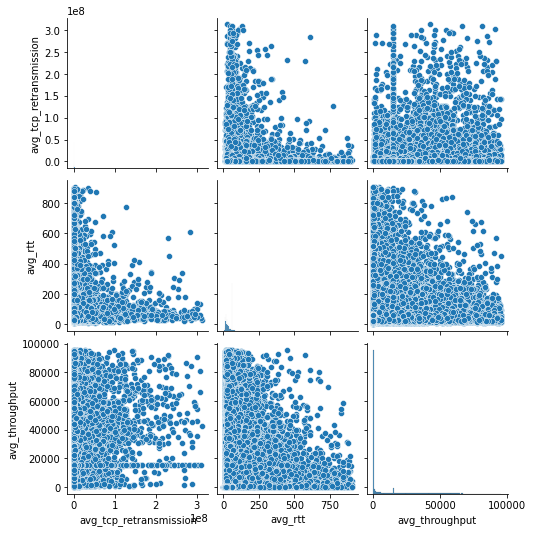

In [18]:
sns.pairplot(data=data,vars=['avg_tcp_retransmission','avg_rtt','avg_throughput'])
plt.show()

# Task 3.3 - Compute & report:
d. The distribution of the average throughput per handset type and provide interpretation for your findings.

e. The average TCP retransmission view per handset type and provide interpretation for your findings

In [19]:
throughput_per_handset = data.groupby('Handset Type')['avg_throughput'].mean()
throughput_per_handset

Handset Type
A-Link Telecom I. Cubot A5                                                             23510.000000
A-Link Telecom I. Cubot Note Plus                                                       6699.000000
A-Link Telecom I. Cubot Note S                                                          8937.000000
A-Link Telecom I. Cubot Nova                                                           56217.000000
A-Link Telecom I. Cubot Power                                                          69468.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       58.000000
Zyxel Communicat. Lte7460                                                              61956.000000
Zyxel Communicat. Sbg3600                                                              15070.474573
Zyxel Communicat. Zyxel Wah7706                                                        

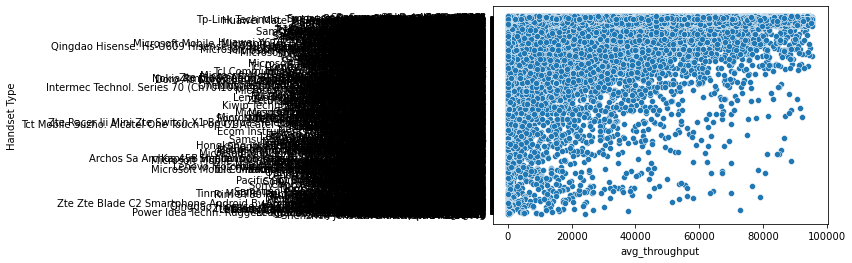

In [20]:
sns.scatterplot(x="avg_throughput",y="Handset Type",data=data)
plt.show()

In [21]:
top_10_throughput_per_handset=throughput_per_handset.nlargest(10)
top_10_throughput_per_handset

Handset Type
Huawei Y9 2019                            91739.000000
Spa Condor Elect. Allure M2               84311.500000
Ovvi-Cellphone T. Echo                    78953.000000
Huawei Pele                               78381.000000
Spa Condor Elect. Plume L2                76529.000000
Shenzhen Leagoo. Leagoo S8                76108.000000
New-Bund Technol. Thor                    75629.666667
Doke Communicati. Blackview Bv6800 Pro    73459.000000
Xiaomi Communica. M1803E1A                72665.000000
Oppo Cph1723                              70668.000000
Name: avg_throughput, dtype: float64

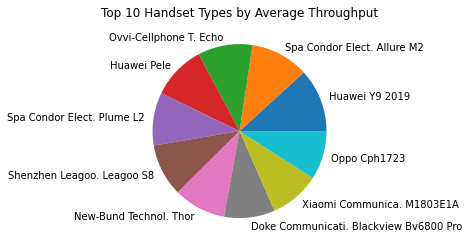

In [22]:
import matplotlib.pyplot as plt

# assuming top_10_throughput_per_handset is a Series with the handset types as the index and the average throughput as the values
labels = top_10_throughput_per_handset.index
sizes = top_10_throughput_per_handset.values

# Create a pie chart
plt.pie(sizes, labels=labels)

# Set the title
plt.title('Top 10 Handset Types by Average Throughput')

# Display the plot
plt.show()

In [23]:
# e. Compute the average TCP retransmission view per handset type
tcp_per_handset = data.groupby('Handset Type')['avg_tcp_retransmission'].mean()
tcp_per_handset 

Handset Type
A-Link Telecom I. Cubot A5                                                                      NaN
A-Link Telecom I. Cubot Note Plus                                                      3.081065e+05
A-Link Telecom I. Cubot Note S                                                         2.070587e+07
A-Link Telecom I. Cubot Nova                                                           6.858500e+04
A-Link Telecom I. Cubot Power                                                          4.020500e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809             NaN
Zyxel Communicat. Lte7460                                                              2.063827e+07
Zyxel Communicat. Sbg3600                                                              2.674347e+07
Zyxel Communicat. Zyxel Wah7706                                                        

In [24]:
top_10_tcp_per_handset = tcp_per_handset.nlargest(10)

print(top_10_tcp_per_handset)

Handset Type
Huawei Bln-Al10                               1.645873e+08
Asustek Asus Zenfone Selfie Zd551Kl           1.608292e+08
Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9     1.341563e+08
Samsung Galaxy J5                             8.481032e+07
Samsung Galaxy J8 2018                        5.787917e+07
Xiaomi Communica. Mi 6                        3.769354e+07
Huawei Y7 Prime 2018                          3.265211e+07
Huawei E587 E587U-2 Turkcell Vinnwifi E587    3.154270e+07
Huawei Me909S-120                             3.072509e+07
Electro Depot Fr. W55Hd                       2.942098e+07
Name: avg_tcp_retransmission, dtype: float64


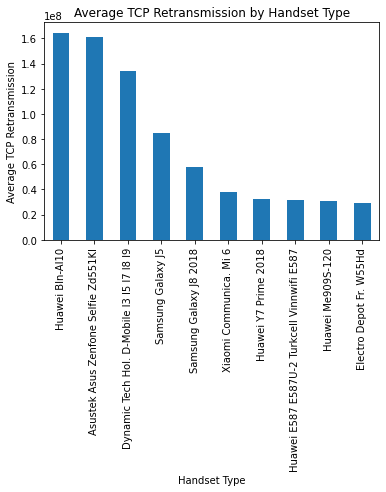

In [25]:
top_10_tcp_per_handset.plot(kind='bar')

# Add axis labels and a title
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.title('Average TCP Retransmission by Handset Type')

plt.show()

# Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

In [26]:
#Check for missing values
print(data.isna().sum())

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [27]:
#Fill missing values with the mean of the column
data.fillna(data[['avg_tcp_retransmission','avg_rtt','avg_throughput' ]].mean(), inplace=True)

In [28]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),avg_tcp_retransmission,avg_rtt,avg_throughput
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0,5.227396e+06,23.500000,67.000000
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0,5.227396e+06,35.000000,42.000000
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0,5.227396e+06,63.512443,15.000000
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0,5.227396e+06,63.512443,88.000000
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0,5.227396e+06,63.512443,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0,5.227396e+06,16.000000,117.000000
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0,5.227396e+06,14.500000,77.000000
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0,5.227396e+06,24.500000,90.000000
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0,5.227396e+06,21.000000,71.000000


In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
# Normalize the experience  metrics
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data[['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']]), columns=['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput'], index=data.index)
normalized_data

,avg_tcp_retransmission,avg_rtt,avg_throughput
0,0.016688,0.025981,0.000701
1,0.016688,0.038695,0.000440
2,0.016688,0.070218,0.000157
3,0.016688,0.070218,0.000921
4,0.016688,0.070218,0.000157
...,...,...,...
149996,0.016688,0.017689,0.001225
149997,0.016688,0.016031,0.000806
149998,0.016688,0.027087,0.000942
149999,0.016688,0.023217,0.000743


In [30]:
# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++')
data['cluster'] = kmeans.fit_predict(normalized_data)

# Interpret the clusters
cluster_means = data.groupby('cluster')[['avg_throughput', 'avg_tcp_retransmission','avg_rtt']].mean()
print("Cluster Means:")
print(cluster_means)
experience_metrics_with_cluster = grouped_data.copy()
experience_metrics_with_cluster['clusters'] = data['cluster']



Cluster Means:
         avg_throughput  avg_tcp_retransmission    avg_rtt
cluster                                                   
0           1758.494734            5.068631e+06  48.750466
1          31465.683074            4.728504e+06  61.431456
2          65880.025269            7.397189e+06  49.610978


In [31]:
experience_metrics_with_cluster['clusters'] 

MSISDN/Number
3.360100e+10   NaN
3.360100e+10   NaN
3.360100e+10   NaN
3.360101e+10   NaN
3.360101e+10   NaN
                ..
3.379000e+10   NaN
3.379000e+10   NaN
3.197021e+12   NaN
3.370000e+14   NaN
8.823971e+14   NaN
Name: clusters, Length: 106856, dtype: float64

In [32]:
for i in range(3):
    cluster_data = data[data['cluster'] == i]
    print(f'Cluster {i}:')
    print(f'  Size: {len(cluster_data)}')
    print(f'  Average TCP Retransmission: {cluster_data["avg_tcp_retransmission"].mean()}')
    print(f'  Average RTT: {cluster_data["avg_rtt"].mean()}')
    print(f'  Average Throughput: {cluster_data["avg_throughput"].mean()}')


Cluster 0:
  Size: 110102
  Average TCP Retransmission: 5068631.118968109
  Average RTT: 48.75046646066951
  Average Throughput: 1758.4947337712304
Cluster 1:
  Size: 25890
  Average TCP Retransmission: 4728503.549461586
  Average RTT: 61.431456001040154
  Average Throughput: 31465.683074414315
Cluster 2:
  Size: 14009
  Average TCP Retransmission: 7397188.516263858
  Average RTT: 49.61097770282987
  Average Throughput: 65880.02526946962


sns.pairplot(data,hue='avg_rtt')

<IPython.core.display.Javascript object>


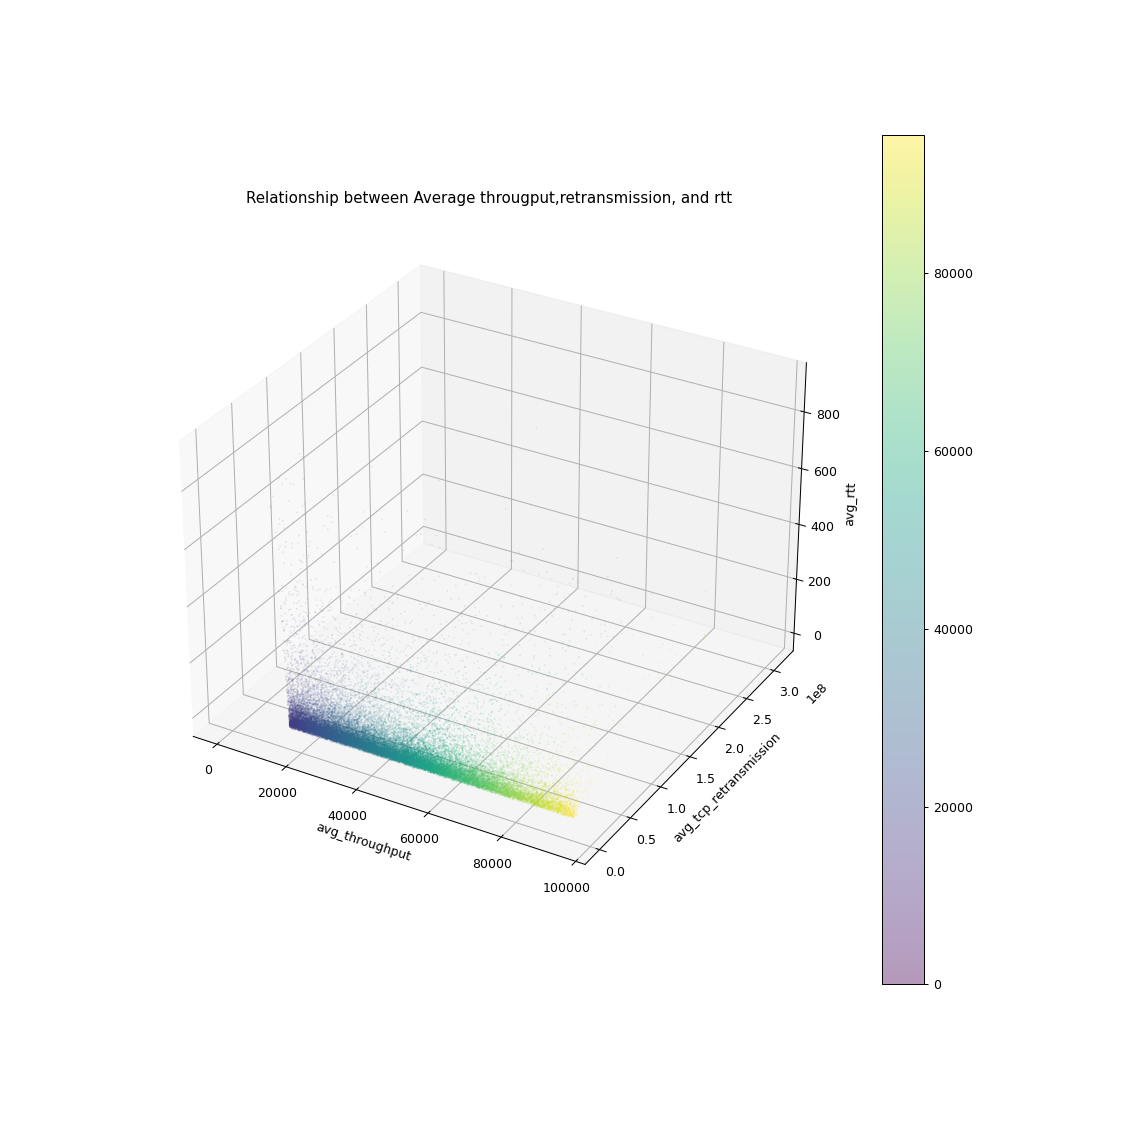

In [33]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
#fig.colorbar(ax, location='right', anchor=(0, 0.3), shrink=0.7)
ax = plt.axes(projection="3d")
fg=ax.scatter3D(data['avg_throughput'], data['avg_tcp_retransmission'], data['avg_rtt'], 
             c = data['avg_throughput'], s = data['cluster']/50, alpha = 0.4)
ax.set_xlabel("avg_throughput")
ax.set_ylabel("avg_tcp_retransmission")
ax.set_zlabel("avg_rtt")
ax.set_title("Relationship between Average througput,retransmission, and rtt")
plt.colorbar(fg)
plt.show()
